In [19]:
# import the necessary packages
from collections import OrderedDict
import numpy as np
import cv2
import argparse
import dlib
import imutils
import matplotlib.pyplot as plt

In [21]:
facial_features_cordinates = {}
# define a dictionary that maps the indexes of the facial

# landmarks to specific face regions
FACIAL_LANDMARKS_INDEXES = OrderedDict([
    ("Mouth", (49, 68)),
    ("Right_Eyebrow", (17, 21)),
    ("Left_Eyebrow", (22, 26)),
    ("Right_Eye", (36, 41)),
    ("Left_Eye", (42, 47)),
    ("Nose", (27, 35)),
    ("Jaw", (0, 16))
])

def shape_to_numpy_array(shape, dtype="int"):
    # initialize the list of (x, y)-coordinates
    coordinates = np.zeros((68, 2), dtype=dtype)

    # loop over the 68 facial landmarks and convert them
    # to a 2-tuple of (x, y)-coordinates
    for i in range(0, 68):
        coordinates[i] = (shape.part(i).x, shape.part(i).y)

    

    # return the list of (x, y)-coordinates
    return coordinates

#landmark 를 이어주는것
def visualize_facial_landmarks_contour(image, shape, colors=None, alpha=0.75):
    # create two copies of the input image -- one for the
    # overlay and one for the final output image
    overlay = image.copy()
    output = image.copy()

    

    # if the colors list is None, initialize it with a unique

    # color for each facial landmark region
    if colors is None:
        colors = [(19, 199, 109), (79, 76, 240), (230, 159, 23),
                  (168, 100, 168), (158, 163, 32),
                  (163, 38, 32), (180, 42, 220)]

    # loop over the facial landmark regions individually
    for (i, name) in enumerate(FACIAL_LANDMARKS_INDEXES.keys()):
        print(i,name)

        # grab the (x, y)-coordinates associated with the
        # face landmark
        (j, k) = FACIAL_LANDMARKS_INDEXES[name]
        pts = shape[j:k]
        facial_features_cordinates[name] = pts
#         print("pts : ",pts)
        # check if are supposed to draw the jawline
        if name == "Jaw":        

            # since the jawline is a non-enclosed facial region,
            # just draw lines between the (x, y)-coordinates
            for l in range(1, len(pts)):
                ptA = tuple(pts[l - 1])
                ptB = tuple(pts[l])
                cv2.line(overlay, ptA, ptB, colors[i], 2)

        # otherwise, compute the convex hull of the facial
        # landmark coordinates points and display it
        else:
            hull = cv2.convexHull(pts)
            cv2.drawContours(overlay, [hull], -1, colors[i], -1)
    # apply the transparent overlay
    cv2.addWeighted(overlay, alpha, output, 1 - alpha, 0, output)

    # return the output image
#     print(facial_features_cordinates)
    return output

#landmark 를 점으로 표시 해주는것
def visualize_facial_landmarks_circle(image, shape, colors=None, alpha=0.75):
    
    for i in range(len(shape)):
        po=shape[i]
        center=(int(po[0]),int(po[1]))
        cv2.circle(image,center,2,(0,255,0),thickness=3)

    return image




In [25]:
#cv2 face detector
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
#dlib landmark detector
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

# load the input image, resize it, and convert it to grayscale
image = cv2.imread('./image/face.jpg')
image = imutils.resize(image, width=500)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

70 144 357 357
23 :  [274 254]
24 :  [304 244]
25 :  [333 240]
26 :  [362 245]
27 :  [362 245]


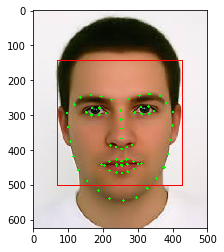

In [26]:
#얼굴 검출
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

#얼굴에 사각형을 그려준다.
for (x,y,w,h) in faces:
    cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2)
print(x,y,w,h)
#dlib을 통해서 얼굴의 landmark 검출    
rect=dlib.rectangle(int(x), int(y), int(x + w), int(y + h))    
# determine the facial landmarks for the face region, then
# convert the landmark (x, y)-coordinates to a NumPy array
shape = predictor(gray, rect)
shape = shape_to_numpy_array(shape)
# 오른쪽 눈썹
print("23 : ",shape[22])   # 사진의 23번 점
print("24 : ",shape[23])
print("25 : ",shape[24])
print("26 : ",shape[25])
print("27 : ",shape[25])

output = visualize_facial_landmarks_circle(image, shape)

plt.imshow(output)
plt.show()
# shape 얼굴인식 결과 배열